## iGraph tutorial

This notebook is for using the python bindings for iGraph, if you prefer R (ugh!) or even C/C++ (OMG!) refer to the corresponding documentation.

If you want to install python-igraph on windows or mac you should follow the documentation instructions http://igraph.org/python/#startpy

To generate scalable vector graphs (SVG) with the plot methods you need *pycairo* (it is not instalable using pip, you have to download it from http://cairographics.org/pycairo/) and the library *cairo* has to be installed in your linux). We will avoid using pycairo generating png files instead.

In this notebook it is also used `numpy` and `matplotlib`

Apart from this notebook, the tutorial for iGraph is a good starting point http://igraph.org/python/doc/tutorial/tutorial.html

In [1]:
import sys
print(sys.version)
print(sys.version_info)

3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=3, releaselevel='final', serial=0)


In [2]:
# !pip3 install igraph --user
# !pip3 install pycairo --user
# !pip3 install python-igraph --user
# !pip3 install matplotlib

In [3]:
import igraph
from igraph import Graph

---
## 1. Creating and manipulating graphs

Creating a graph is simple, this is an **empty** graph (print returns a representation of the graph)

In [4]:
g = Graph()
print(g)

IGRAPH U--- 0 0 --


We can add vertices like for example, vertices from [0..3]

In [5]:
g.add_vertices(4)
print(g)

IGRAPH U--- 4 0 --


and some edges among them (as a list of pairs)

In [6]:
g.add_edges([(1,2), (1,3), (2,3), (3, 0)])
print(g)

IGRAPH U--- 4 4 --
+ edges:
1--2 1--3 2--3 0--3


Class `Graph` provides a couple of iterators to traverse the vertices (**vs**) and the edges (**es**)

In [7]:
for v in g.vs:
    print(v)

igraph.Vertex(<igraph.Graph object at 0x000002306FDF0150>, 0, {})
igraph.Vertex(<igraph.Graph object at 0x000002306FDF0150>, 1, {})
igraph.Vertex(<igraph.Graph object at 0x000002306FDF0150>, 2, {})
igraph.Vertex(<igraph.Graph object at 0x000002306FDF0150>, 3, {})


In [8]:
for e in g.es:
    print(e)

igraph.Edge(<igraph.Graph object at 0x000002306FDF0150>, 0, {})
igraph.Edge(<igraph.Graph object at 0x000002306FDF0150>, 1, {})
igraph.Edge(<igraph.Graph object at 0x000002306FDF0150>, 2, {})
igraph.Edge(<igraph.Graph object at 0x000002306FDF0150>, 3, {})


Properties can be attached to the vertices (and the edges)

In [9]:
for i, v in enumerate(g.vs):
    v['name'] = str(i)
for v in g.vs:
    print(v)
    print(v.attributes())

igraph.Vertex(<igraph.Graph object at 0x000002306FDF0150>, 0, {'name': '0'})
{'name': '0'}
igraph.Vertex(<igraph.Graph object at 0x000002306FDF0150>, 1, {'name': '1'})
{'name': '1'}
igraph.Vertex(<igraph.Graph object at 0x000002306FDF0150>, 2, {'name': '2'})
{'name': '2'}
igraph.Vertex(<igraph.Graph object at 0x000002306FDF0150>, 3, {'name': '3'})
{'name': '3'}


In [10]:
import random
for edge in g.es:
    edge['weight'] = random.randint(1,10)
for edge in g.es:
    print(edge)
    print(edge['weight'])

igraph.Edge(<igraph.Graph object at 0x000002306FDF0150>, 0, {'weight': 8})
8
igraph.Edge(<igraph.Graph object at 0x000002306FDF0150>, 1, {'weight': 4})
4
igraph.Edge(<igraph.Graph object at 0x000002306FDF0150>, 2, {'weight': 8})
8
igraph.Edge(<igraph.Graph object at 0x000002306FDF0150>, 3, {'weight': 10})
10


Class `Graph` has methods to compute properties of a graph and many useful algorithms (https://igraph.org/python/doc/api/igraph.Graph.html)


In [11]:
g.degree()

[1, 2, 2, 3]

In [12]:
g.edge_betweenness()  # Edge betweenness is a measure of the number of shortest paths going through a given edge.

[1.0, 2.0, 2.0, 3.0]

---
## 2. Plotting graphs

Plotting the graph is a little bit more complicated because by default it uses the Cairo library.

If the cairo library is not installed on your machine, we can circunvent this problem by generating a `png` file and loading it in the notebook. There are different styles and layouts for plotting a graph, you can look for the parameters in the documentation of the plot function in the Graph class.

If the cairo library is installed on your computer, then saving the `.png` file and displaying it is not necessary.

In [13]:
# !pip3 install cairocffi --user

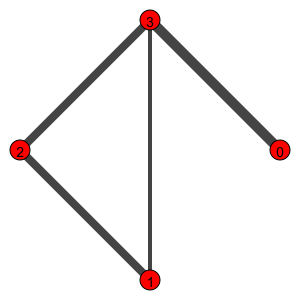

In [14]:
from IPython import display
from igraph import plot

# with cairo:

g.vs['label'] = g.vs['name']
g.es['width'] = g.es['weight']
plot(g, layout = g.layout_circle(), bbox = (300,300))

---
## 3. Graph Generators

iGraph implements several graph generators (Erdos-Renyi, Barabasi, Watts-Strogratz, ...). This should be very useful to solve your lab tasks for today.

Different layouts can be used for plotting the graphs; these layouts define where vertices are places (in 2D) in order to visualize your generated networks.

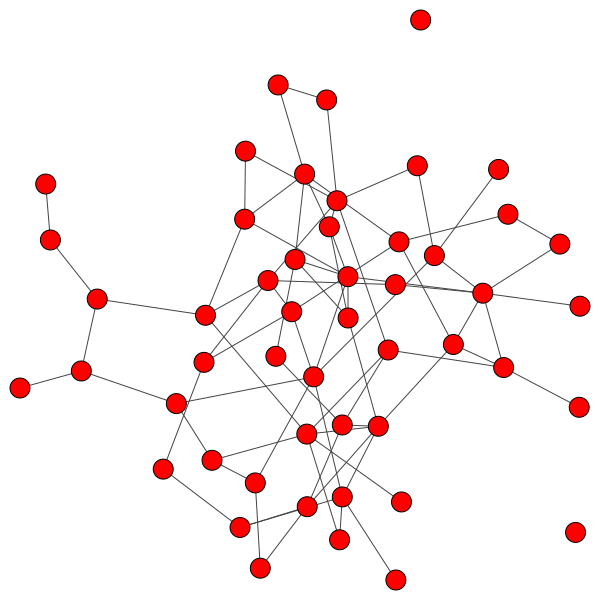

In [43]:
erdos = Graph.Erdos_Renyi(50, 0.05)  # 50 nodes, 0.05 probability of edge between any two nodes
plot(erdos)

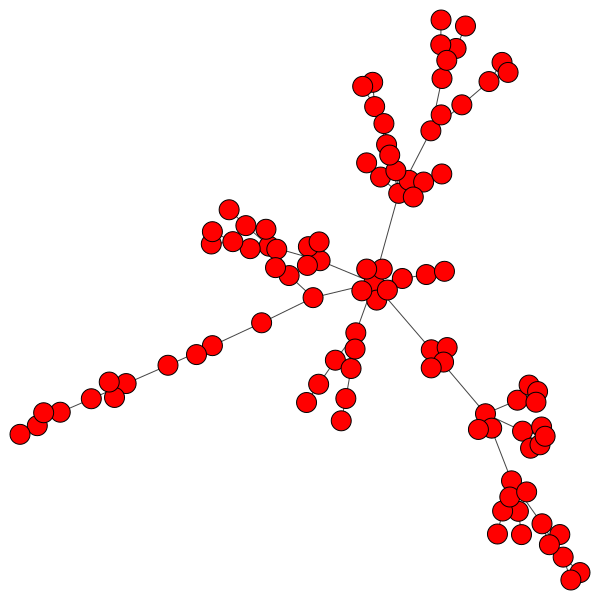

In [16]:
barabasi = Graph.Barabasi(100,1)  # 100 nodes, 1 edge per node
plot(barabasi, layout = barabasi.layout_fruchterman_reingold())

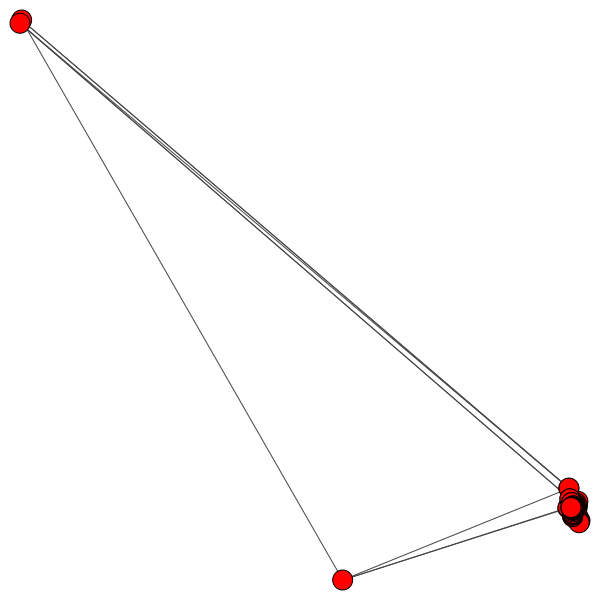

In [17]:
watts = Graph.Watts_Strogatz(1,100,2,0.05)  # 1 ring, 100 nodes, each node connected to 2 neighbors, 0.05 probability of rewiring
plot(watts, layout = watts.layout_lgl())

---
## 4. Measuring graphs

There are many measures that help us understand and characterize networks. We have seen three in class: _diameter_ (or _average path length_), _clustering coefficient_ (or _transitivity_), and _degree distribution_. `igraph` provides functions that compute these measures for you. 

The examples below illustrate the usage of these functions.

#### For a lattice network

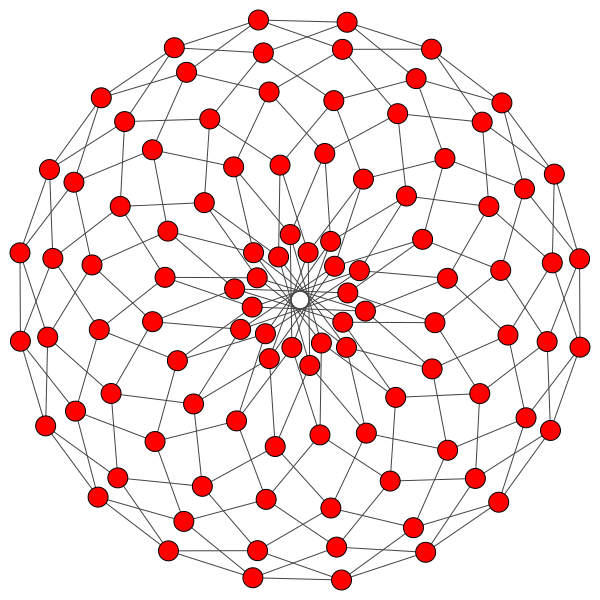

In [44]:
lattice = Graph.Lattice([10,10])  # 10x10 lattice
plot(lattice, layout=lattice.layout_kamada_kawai())

In [19]:
lattice.diameter(), lattice.average_path_length()

(10, 5.05050505050505)

In [20]:
# here we rewire 20% of the edges randomly, and see how it affects the average path length and diameter (should shrink)

lattice.rewire_edges(0.2)
lattice.diameter(), lattice.average_path_length()

(7, 3.5686868686868687)

#### For a Watts-Strogatz graph

In [45]:
p_hat = len(watts.es)/(len(watts.vs)*len(watts.vs)/2)
p_hat, watts.transitivity_undirected()

(0.04, 0.39935064935064934)

#### For a ER graph

In [46]:
p_hat = len(erdos.es)/(len(erdos.vs)*len(erdos.vs)/2)
p_hat, erdos.transitivity_undirected()

(0.0624, 0.06329113924050633)

#### For a Ring graph

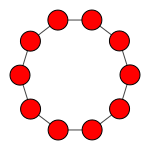

In [47]:
ring = Graph.Ring(10)
plot(ring, layout=ring.layout_kamada_kawai(), bbox=(150,150))

In [24]:
p_hat = len(ring.es)/(len(ring.vs)*len(ring.vs)/2)
p_hat, ring.transitivity_undirected()

(0.2, 0.0)

In [25]:
ring.degree()

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

#### For a BA graph

In [26]:
barabasi = Graph.Barabasi(1000,3)  # 1000 nodes, 3 edges per node
p_hat = len(barabasi.es)/((len(barabasi.vs)-1)*len(barabasi.vs)/2.0)
p_hat, barabasi.transitivity_undirected()

(0.005993993993993994, 0.017825704225352113)

In [27]:
# generate ER graph with same nr of vertices and approximately same number of edges as BA network
erdos = Graph.Erdos_Renyi(1000, p_hat)

In [28]:
import numpy as np
h, b = np.histogram(erdos.degree(), bins=np.max(erdos.degree()), density=True)
print(h)
print(b)

[0.01507692 0.05815385 0.10876923 0.14861538 0.17984615 0.15615385
 0.14753846 0.10015385 0.07       0.04846154 0.02369231 0.00969231
 0.00646154 0.00430769]
[ 1.          1.92857143  2.85714286  3.78571429  4.71428571  5.64285714
  6.57142857  7.5         8.42857143  9.35714286 10.28571429 11.21428571
 12.14285714 13.07142857 14.        ]


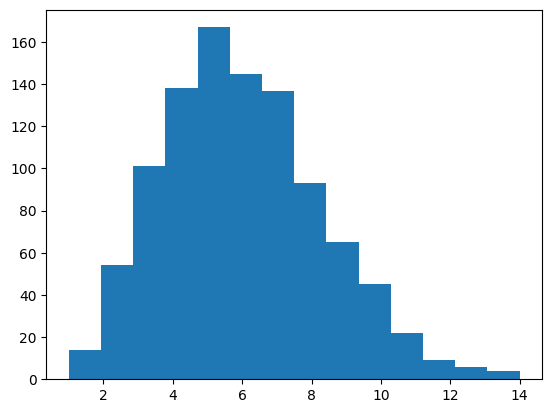

In [29]:
import matplotlib.pyplot as plt

r = plt.hist(erdos.degree(), bins=np.max(erdos.degree()))

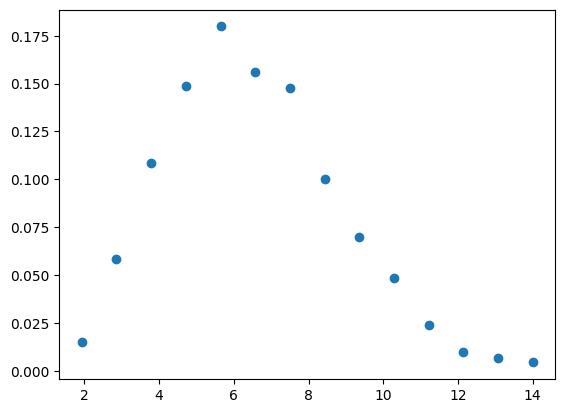

In [30]:
r = plt.plot(b[1:], h, 'o' )

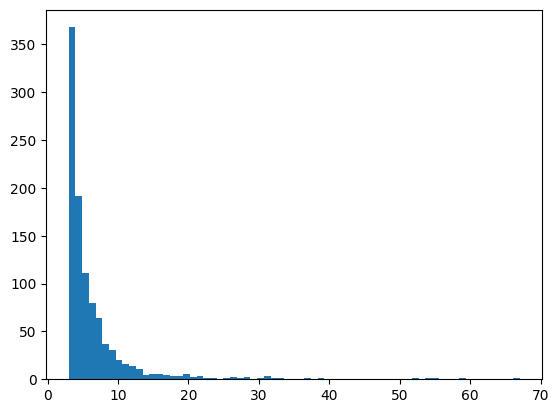

In [31]:
r = plt.hist(barabasi.degree(), bins=np.max(barabasi.degree()))

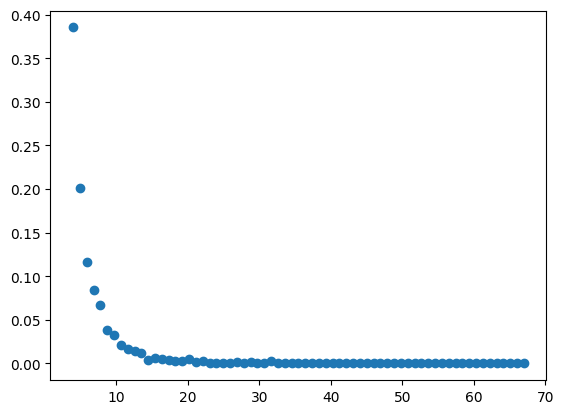

In [32]:
h, b = np.histogram(barabasi.degree(), bins=np.max(barabasi.degree()), density=True)
r = plt.plot(b[1:], h, 'o')

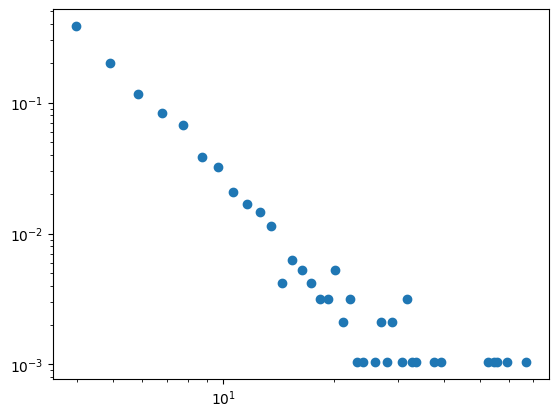

In [33]:
r = plt.loglog(b[1:], h, 'o')

---
## 5. Node centrality

First we creeate a graph following the Erdos-Reny model

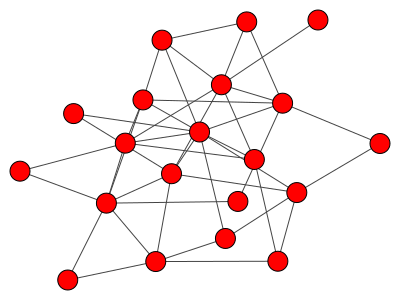

In [34]:
erdos = Graph.Erdos_Renyi(20,0.2)

plot(erdos, layout = erdos.layout_kamada_kawai(), bbox=(400,300))

#### **Betweenness** centrality

In [35]:
erdos.betweenness()

[2.2333333333333334,
 0.0,
 27.6952380952381,
 11.104761904761904,
 21.650000000000002,
 3.333333333333333,
 2.40952380952381,
 32.09285714285715,
 0.65,
 7.602380952380953,
 0.0,
 0.0,
 22.983333333333334,
 15.923809523809524,
 33.41428571428572,
 3.802380952380952,
 0.0,
 12.60238095238095,
 8.169047619047618,
 1.3333333333333333]

#### **Degree** centrality

In [36]:
erdos.degree()

[3, 2, 7, 5, 6, 3, 2, 7, 3, 4, 2, 2, 6, 6, 9, 4, 1, 5, 5, 2]

#### **Closeness** centrality

In [37]:
erdos.closeness()

[0.4634146341463415,
 0.3877551020408163,
 0.5588235294117647,
 0.5,
 0.5277777777777778,
 0.4418604651162791,
 0.4418604651162791,
 0.5757575757575758,
 0.4318181818181818,
 0.5135135135135135,
 0.41304347826086957,
 0.4418604651162791,
 0.59375,
 0.5757575757575758,
 0.6129032258064516,
 0.475,
 0.37254901960784315,
 0.5,
 0.5428571428571428,
 0.40425531914893614]

####  **Pagerank** centrality

In [38]:
erdos.pagerank()

[0.0369717081163085,
 0.027518839346001144,
 0.08109699137399051,
 0.05920632793506196,
 0.07004725281486324,
 0.03770755149466139,
 0.027270852625137804,
 0.08192146557145646,
 0.03731056026734416,
 0.046922956279522615,
 0.02690375046767822,
 0.026364618838750714,
 0.06797176946615324,
 0.06745594346808968,
 0.09778536879930712,
 0.04677455490930988,
 0.017447606533676857,
 0.05983145609589584,
 0.056001989032391196,
 0.027488436564399497]

---
## 6. Community detection


In [39]:
com = erdos.community_edge_betweenness()
print ('Clusters:', com.optimal_count) # Optimal number of clusters from the dendrogram

Clusters: 7


the `as_clustering` method of the dendrogram "cuts" the dendogramobject returns a graph with the clusters:

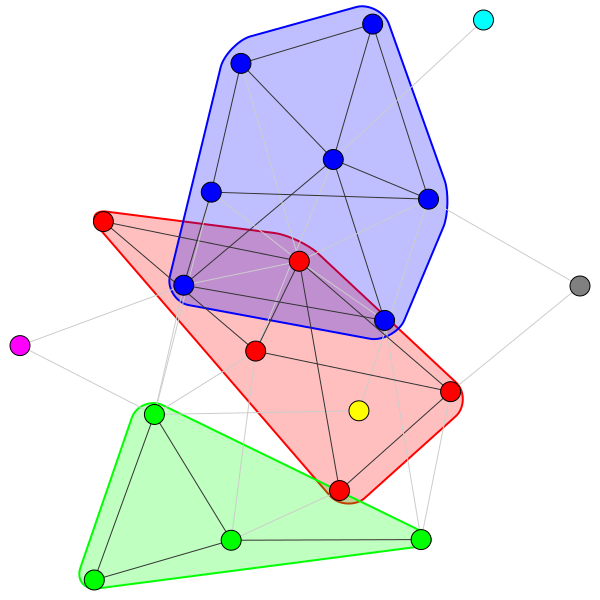

In [40]:
r = plot(com.as_clustering(), layout = erdos.layout_kamada_kawai(),mark_groups=True, target="./coms.png")
display.Image(filename="./coms.png")

You can also obtain the clusters and their vertices

In [41]:
for d in com.as_clustering():
    print(d)

[0, 3, 11, 12, 14]
[1, 2, 5, 17]
[4, 7, 8, 9, 13, 15, 18]
[6]
[10]
[16]
[19]


In [42]:
print(com.as_clustering())

Clustering with 20 elements and 7 clusters
[0] 0, 3, 11, 12, 14
[1] 1, 2, 5, 17
[2] 4, 7, 8, 9, 13, 15, 18
[3] 6
[4] 10
[5] 16
[6] 19
